In [20]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
data = pd.read_excel("Sample_Revenue.xls", sheetname="Sample Data")
data.head()

,Revenue_Performance,Capability_Test_Score,Behavior_A_Score,Behavior_B_Score,Compensation,Service_Month,Type
0,271.8,783.35,33.53,40.55,16.66,13.20,A
1,264.0,748.45,36.50,36.19,16.46,14.11,A
2,238.8,684.45,34.66,37.31,17.66,15.68,A
3,230.7,827.80,33.13,32.52,17.50,10.53,A
4,251.6,860.45,35.75,33.71,16.40,11.00,B


In [22]:
data.shape

(29, 7)

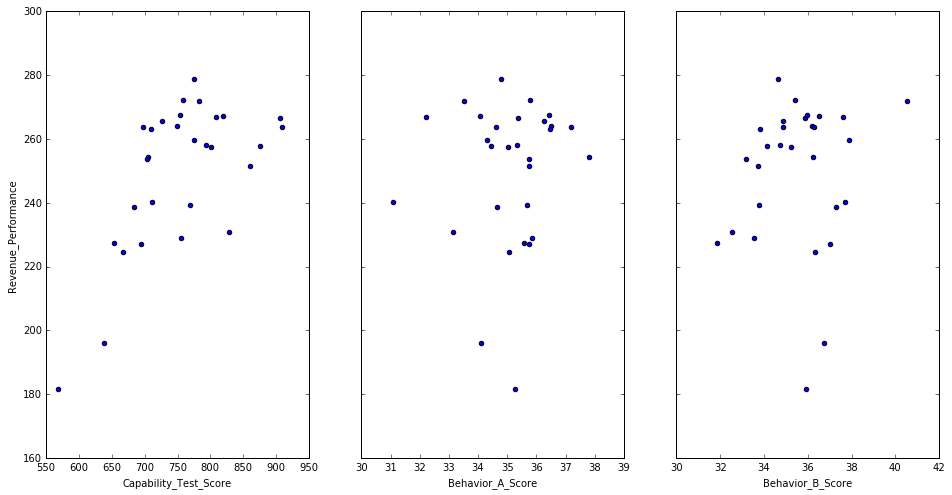

In [24]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x="Capability_Test_Score", y="Revenue_Performance", ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x="Behavior_A_Score", y="Revenue_Performance", ax=axs[1])
data.plot(kind='scatter', x="Behavior_B_Score", y="Revenue_Performance", ax=axs[2])

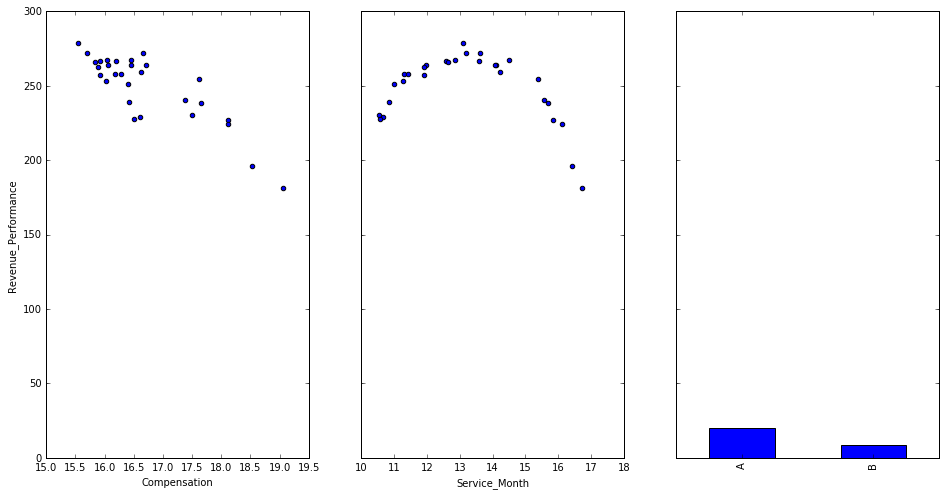

In [25]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x="Compensation", y="Revenue_Performance", ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x="Service_Month", y="Revenue_Performance", ax=axs[1])
data.Type.value_counts().plot(kind='bar')

In [29]:
# use formula notation
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula="Revenue_Performance ~ Capability_Test_Score", data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Revenue_Performance   R-squared:                       0.394
Model:                             OLS   Adj. R-squared:                  0.371
Method:                  Least Squares   F-statistic:                     17.55
Date:                 Sun, 10 Jul 2016   Prob (F-statistic):           0.000268
Time:                         21:22:14   Log-Likelihood:                -124.18
No. Observations:                   29   AIC:                             252.4
Df Residuals:                       27   BIC:                             255.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept               113.7485     32.612      3.488      0.002        46.834   180.663
Capability_Test_Score     0.1801      0.043      4.189      0.000         0.092     0.268
==============================================================================
Omnibus:                        2.091   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                1.491
Skew:                          -0.341   Prob(JB):                        0.475
Kurtosis:                       2.124   Cond. No.                     7.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
lm.params

Intercept                113.748518
Capability_Test_Score      0.180111
dtype: float64

In [35]:
new_data = pd.read_excel("Sample_Revenue.xls", sheetname="Prediction")

In [36]:
new_data

,Revenue_Performance,Capability_Test_Score,Behavior_A_Score,Behavior_B_Score,Compensation,Service_Month,Type
0,NaN,500,30,50,19,11,B


In [38]:
lm.predict(new_data)

array([ 203.80423097])

In [40]:
CTS = pd.DataFrame({'Capability_Test_Score': [data.Capability_Test_Score.min(), data.Capability_Test_Score.max()]})
CTS

,Capability_Test_Score
0,568.55
1,909.45


In [41]:
preds = lm.predict(CTS)
preds

array([ 216.15086927,  277.55085467])

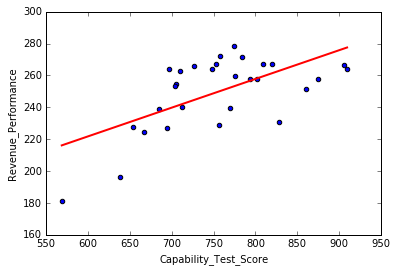

In [42]:
data.plot(kind='scatter', x='Capability_Test_Score', y='Revenue_Performance')
plt.plot(CTS, preds, c='red', linewidth=2)